# Plotting in Julia

**Warning**: The time to first plot can be frustratingly long in Julia because of the JIT compilation.

The three most popular options (as far as I know) in Julia are

- [Gadfly.jl](https://github.com/GiovineItalia/Gadfly.jl)
    - Julia equivalent of `ggplot2` in R
    
- [PyPlot.jl](https://github.com/JuliaPy/PyPlot.jl)
    - Wrapper for Python's matplotlib
    
    
- [Plots.jl](https://github.com/JuliaPlots/Plots.jl)
    - Defines an unified interface for plotting
    - maps arguments to different plotting "backends"
        - PyPlot, GR, PlotlyJS, and many more  
    - For a complete list of backends: <http://docs.juliaplots.org/latest/backends/>  
    - Mapping of attributes to backends: <http://docs.juliaplots.org/latest/supported/>  
    - First runs can be slowish. I found the GR backend fastest and most stable.

## Gadfly.jl

To demonstrate Gadfly, we will go through an example and compare it to ggplot2. 

┌ Warning: RCall.jl: 
│ Attaching package: ‘dplyr’
│ 
│ The following objects are masked from ‘package:stats’:
│ 
│     filter, lag
│ 
│ The following objects are masked from ‘package:base’:
│ 
│     intersect, setdiff, setequal, union
│ 
└ @ RCall /Users/huazhou/.julia/packages/RCall/g7dhB/src/io.jl:113


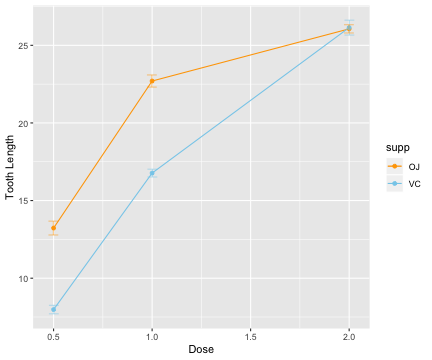

RObject{VecSxp}


In [1]:
using RCall

R"""
library(ggplot2)
library(dplyr)

df <- ToothGrowth %>%
  group_by(supp, dose) %>%
  summarise(se = sd(len) / n(), len = mean(len), n = n())

ggplot(df, aes(x = dose, y = len, group = supp, color = supp)) + 
  geom_line() +
  geom_point() +
  geom_errorbar(aes(ymin = len - se, ymax = len + se), width = 0.1, alpha = 0.5,
  position = position_dodge(0.005)) +  
  scale_color_manual(values = c(VC = "skyblue", OJ = "orange")) + 
  labs(x = "Dose", y = "Tooth Length") 
"""

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[2]:3
└ @ Core In[2]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[2]:3
└ @ Core In[2]:3
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[2]:3
└ @ Core In[2]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[2]:4
└ @ Core In[2]:4
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[2]:4
└ @ Core In[2]:4
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end

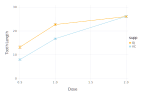

In [2]:
@rget df # retrieve dataframe from R to Julia workspace
using Gadfly
df[:ymin] = df[:len] - df[:se]
df[:ymax] = df[:len] + df[:se]
Gadfly.plot(df, 
    x = :dose, 
    y = :len, 
    color = :supp, 
    Geom.point,
    Guide.xlabel("Dose"), 
    Guide.ylabel("Tooth Length"), 
    Guide.xticks(ticks = [0.5, 1.0, 1.5, 2.0]),
    Geom.line, 
    Geom.errorbar, 
    ymin = :ymin, 
    ymax = :ymax, 
    Scale.color_discrete_manual("orange", "skyblue"))

Both offer more customized options

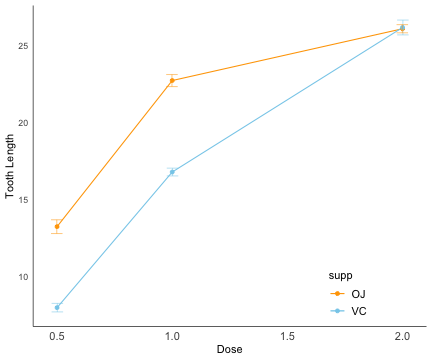

RObject{VecSxp}


In [3]:
R"""
ggplot(df, aes(x = dose, y = len, group = supp, color = supp)) + 
  geom_line() +
  geom_point() +
  geom_errorbar(aes(ymin = len - se, ymax = len + se), width = 0.1, alpha = 0.5, 
    position = position_dodge(0.005)) + 
    theme(legend.position = c(0.8,0.1), 
    legend.key = element_blank(), 
    axis.text.x = element_text(angle = 0, size = 11), 
    axis.ticks = element_blank(), 
    panel.grid.major = element_blank(), 
    legend.text=element_text(size = 11),
    panel.border = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), 
    axis.line = element_line(color = 'black',size = 0.3), 
  plot.title = element_text(hjust = 0.5)) + 
  scale_color_manual(values = c(VC = "skyblue", OJ = "orange")) + 
  labs(x = "Dose", y = "Tooth Length")
"""

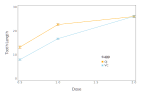

In [4]:
Gadfly.plot(df, x = :dose, y = :len, color = :supp, Geom.point,
    Guide.xlabel("Dose"), Guide.ylabel("Tooth Length"), 
    Guide.xticks(ticks = [0.5, 1.0, 1.5, 2.0]),
    Theme(panel_fill = nothing, highlight_width = 0mm, point_size = 0.5mm,
    key_position = :inside, 
    grid_line_width = 0mm, panel_stroke = colorant"black"),
    Geom.line, Geom.errorbar, ymin = :ymin, ymax = :ymax, 
    Scale.color_discrete_manual("orange", "skyblue"))

## Plots.jl

We demonstrate Plots.jl below:

In [5]:
# Pkg.add("Plots")
using Plots, Random

Random.seed!(123) # set seed
x = cumsum(randn(50, 2), dims=1);

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1260


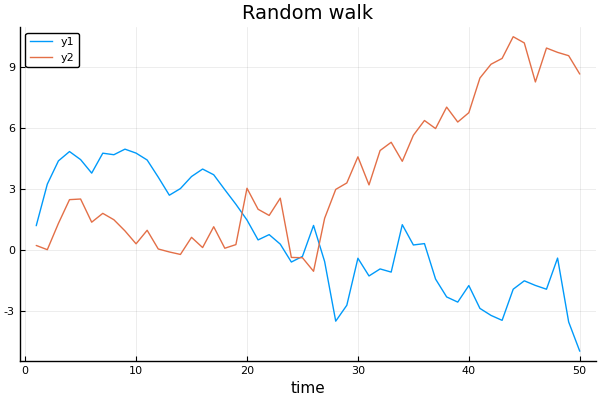

In [6]:
# Pkg.add("PyPlot")
pyplot()  # set the backend to PyPlot
Plots.plot(x, title="Random walk", xlab="time")

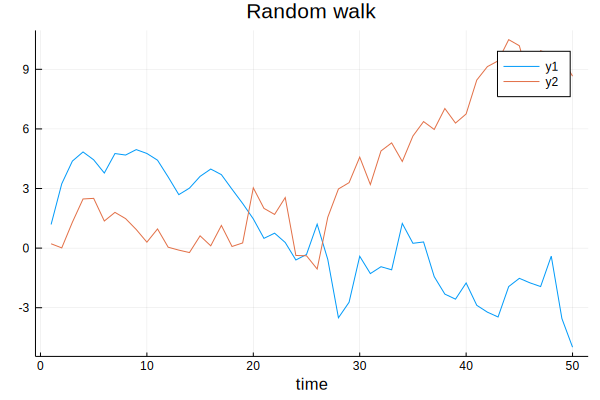

In [7]:
gr()   # change backend to GR
Plots.plot(x, title="Random walk", xlab="time")

```
gr()
@gif for i in 1:20
    Plots.plot(x -> sin(x) / (.2i), 0, i, xlim=(0, 20), ylim=(-.75, .75))
    scatter!(x -> cos(x) * .01 * i, 0, i, m=1)
end;
```
produces following animation.

<img src="./tmp.gif" />

In [8]:
# Pkg.add("PlotlyJS")
plotlyjs()  # change backend to PlotlyJS
Plots.plot(x, title="Random walk", xlab="time")

┌ Info: Precompiling PlotlyJS [f0f68f2c-4968-5e81-91da-67840de0976a]
└ @ Base loading.jl:1260


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6624493423426818505\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-18268710559253636087\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-6624493423426818505\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Precompiling ORCA [47be7bcc-f1a6-5447-8b36-7eeeff7534fd]
└ @ Base loading.jl:1260


<!DOCTYPE html>
 
 
 Plots.jl